In [2]:
import pandas as pd
import matplotlib.pyplot as plt

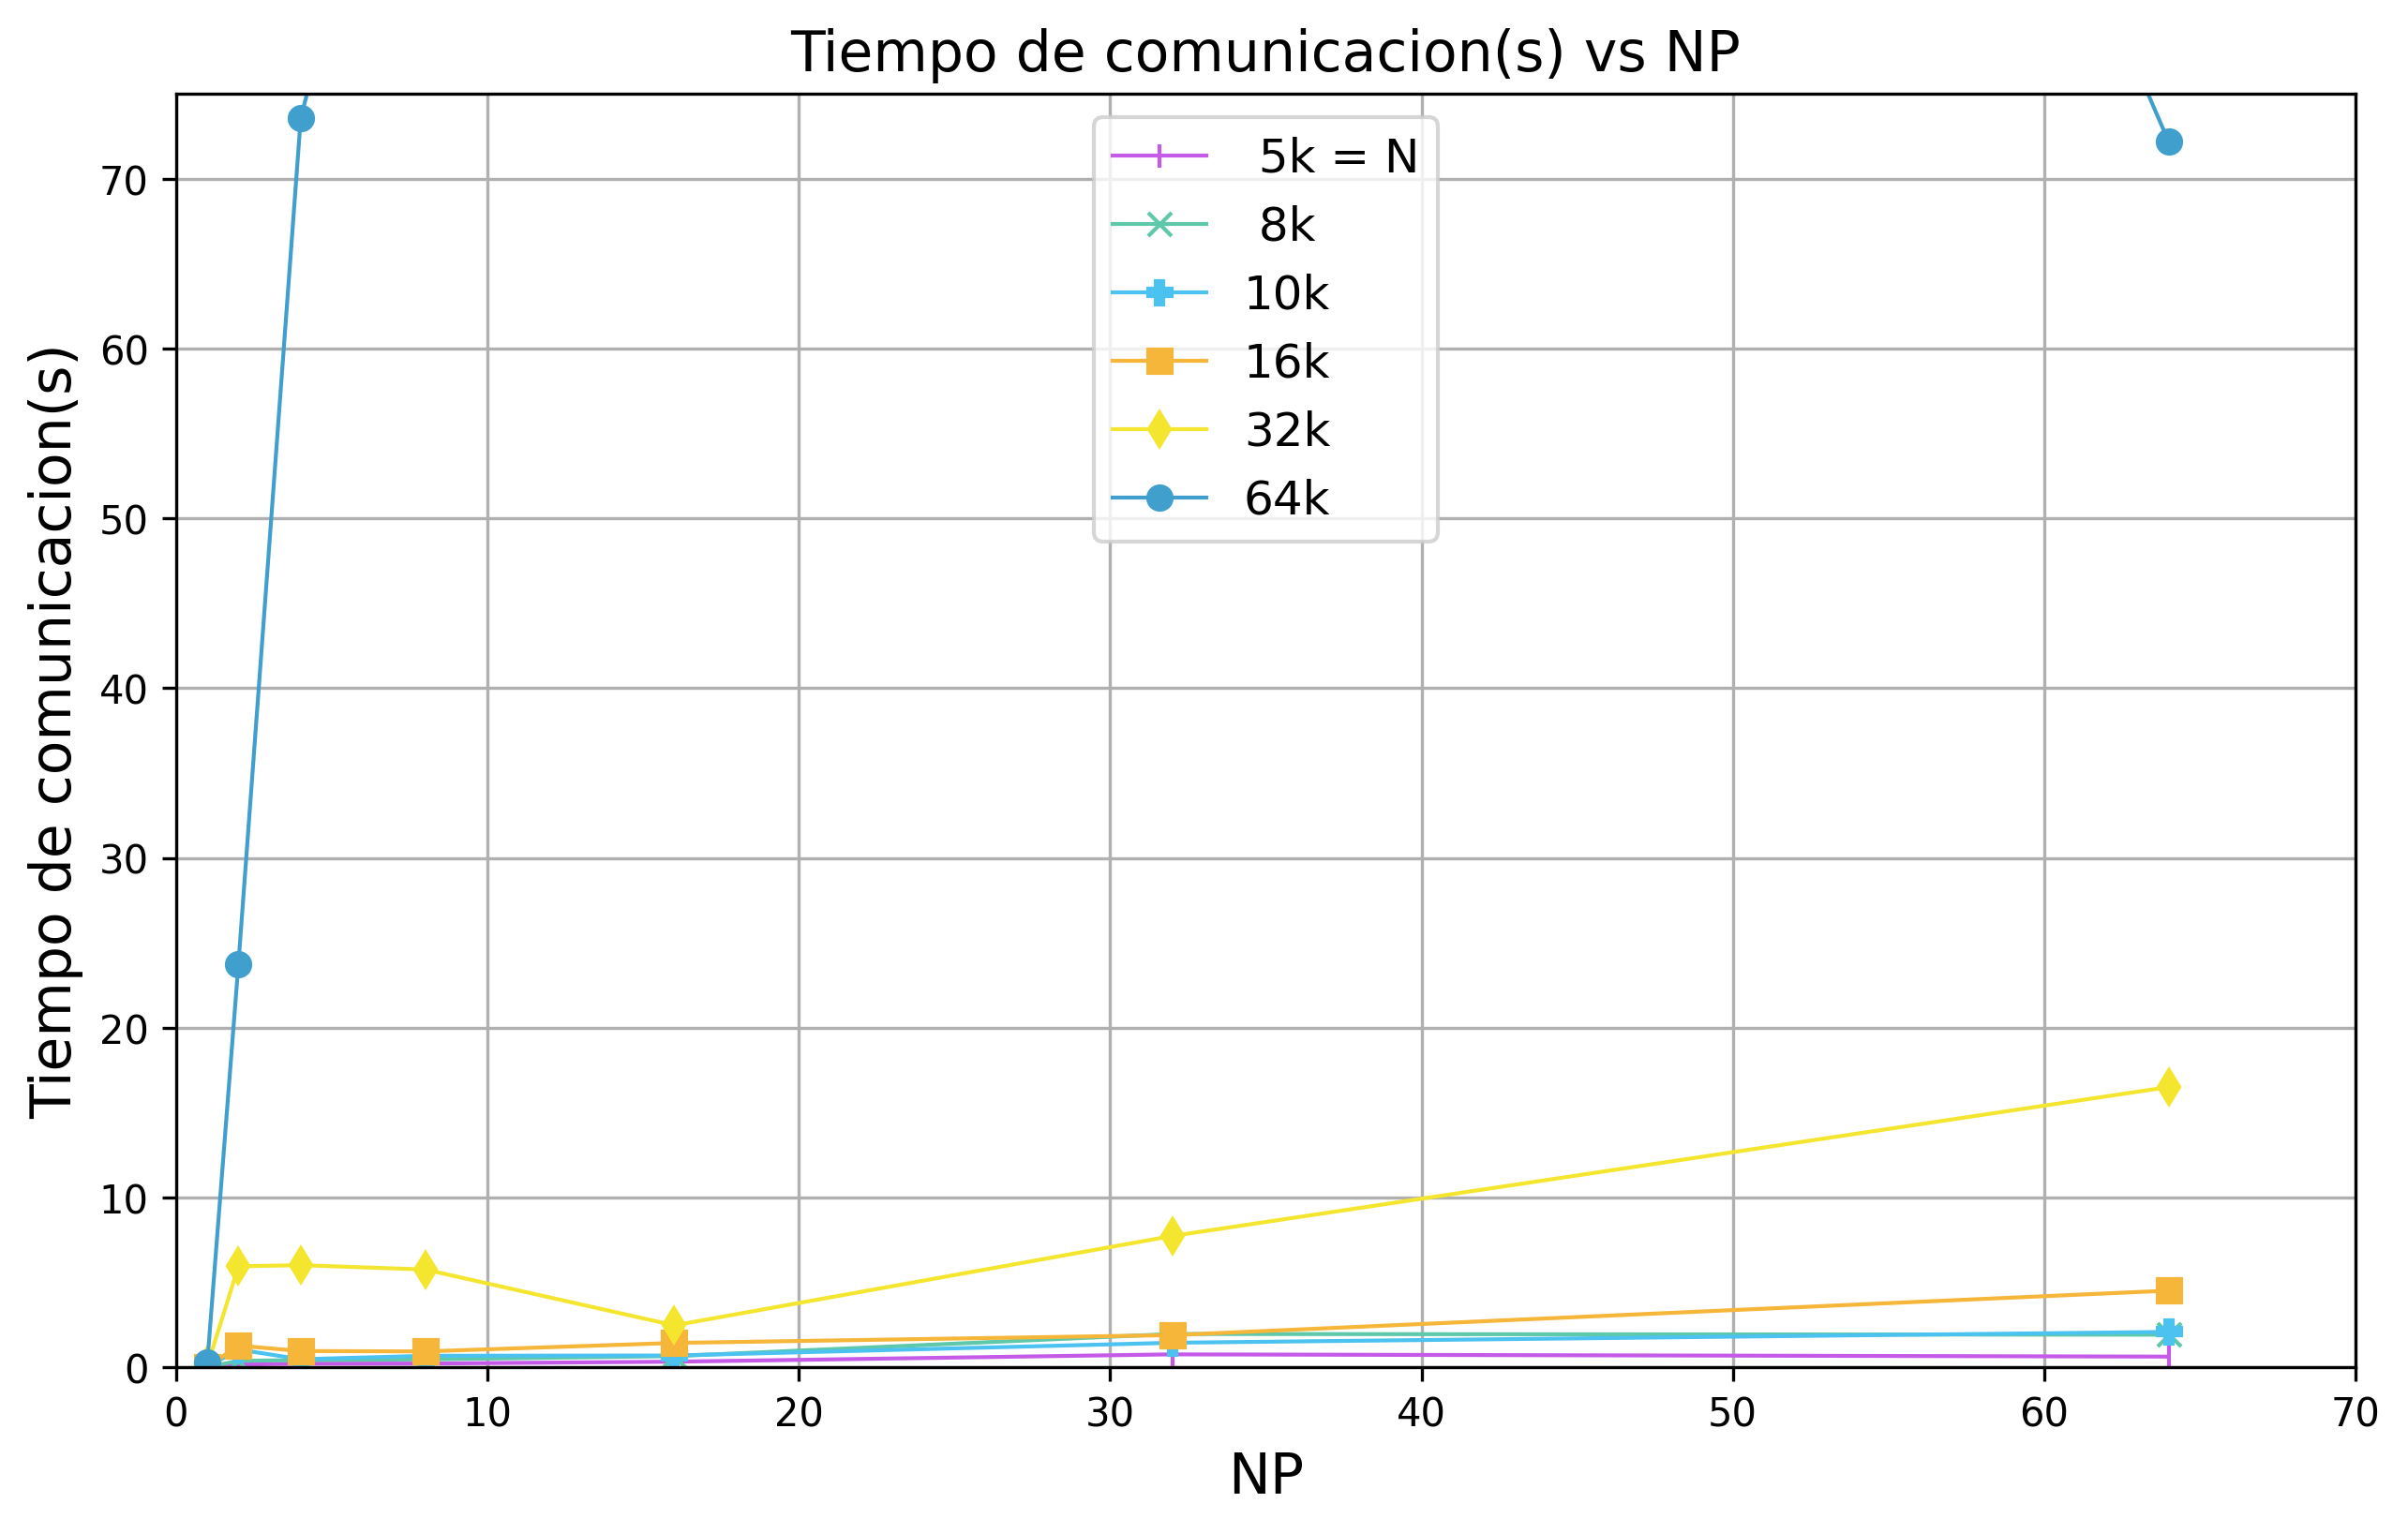

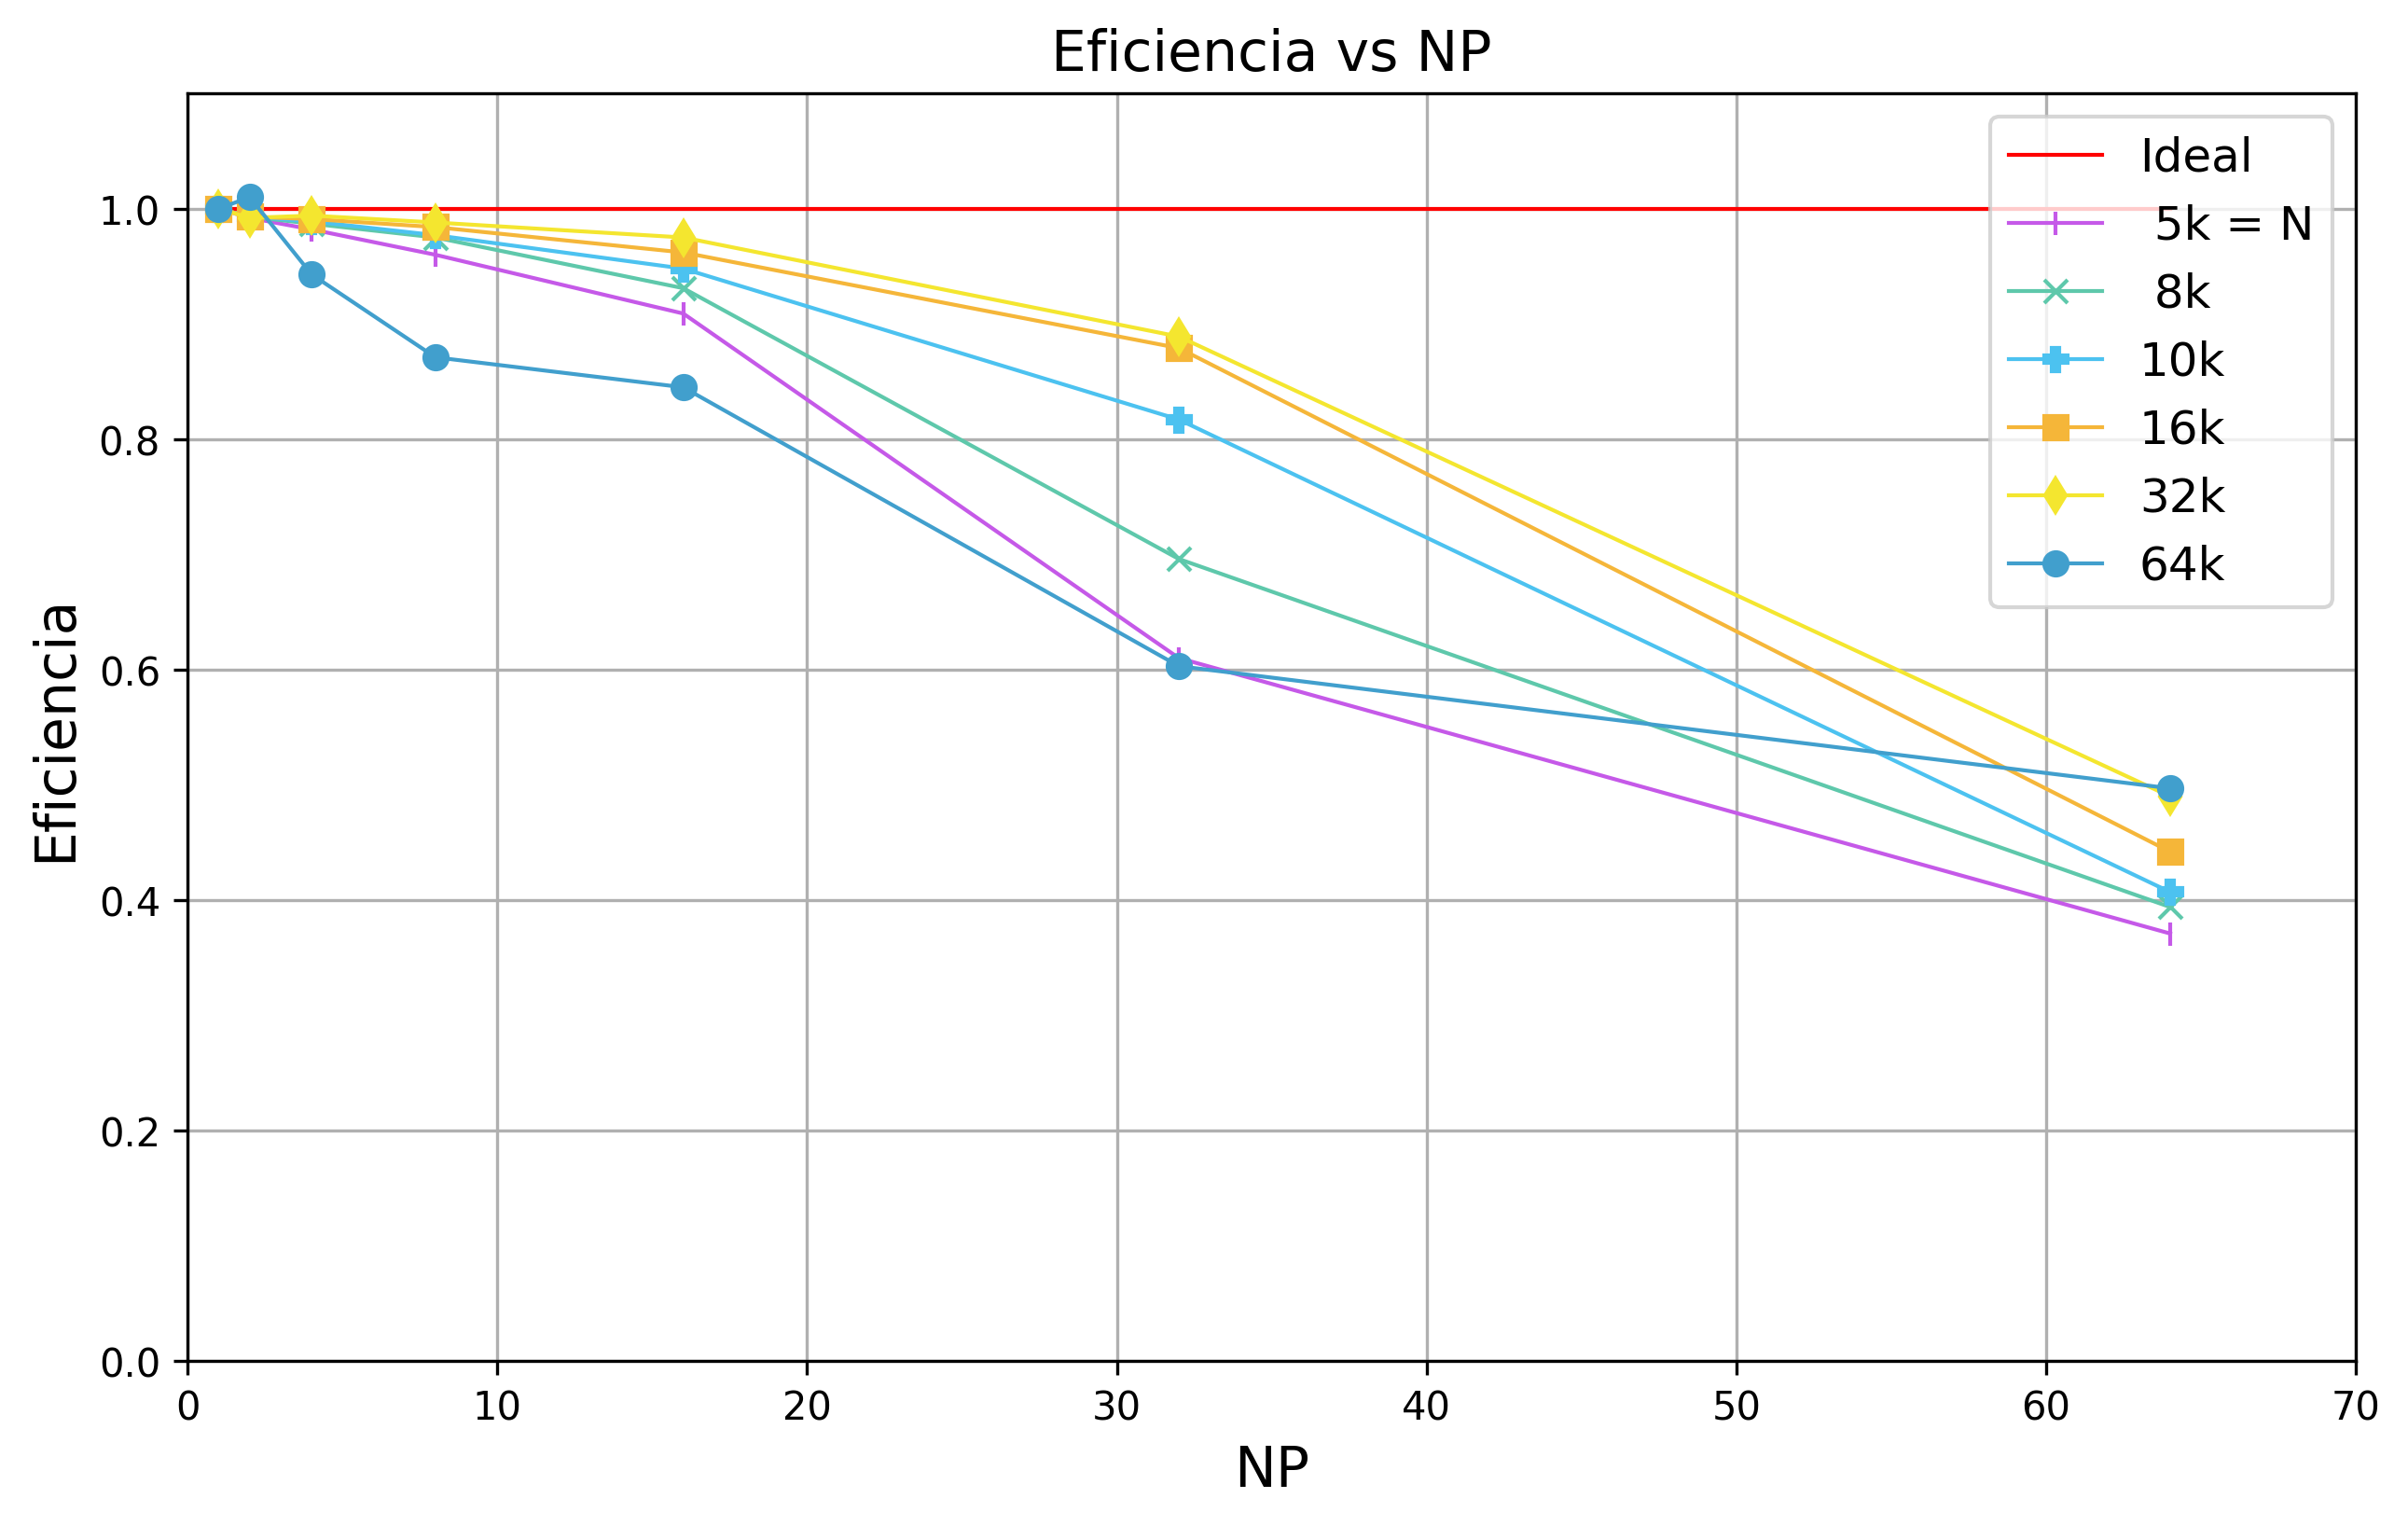

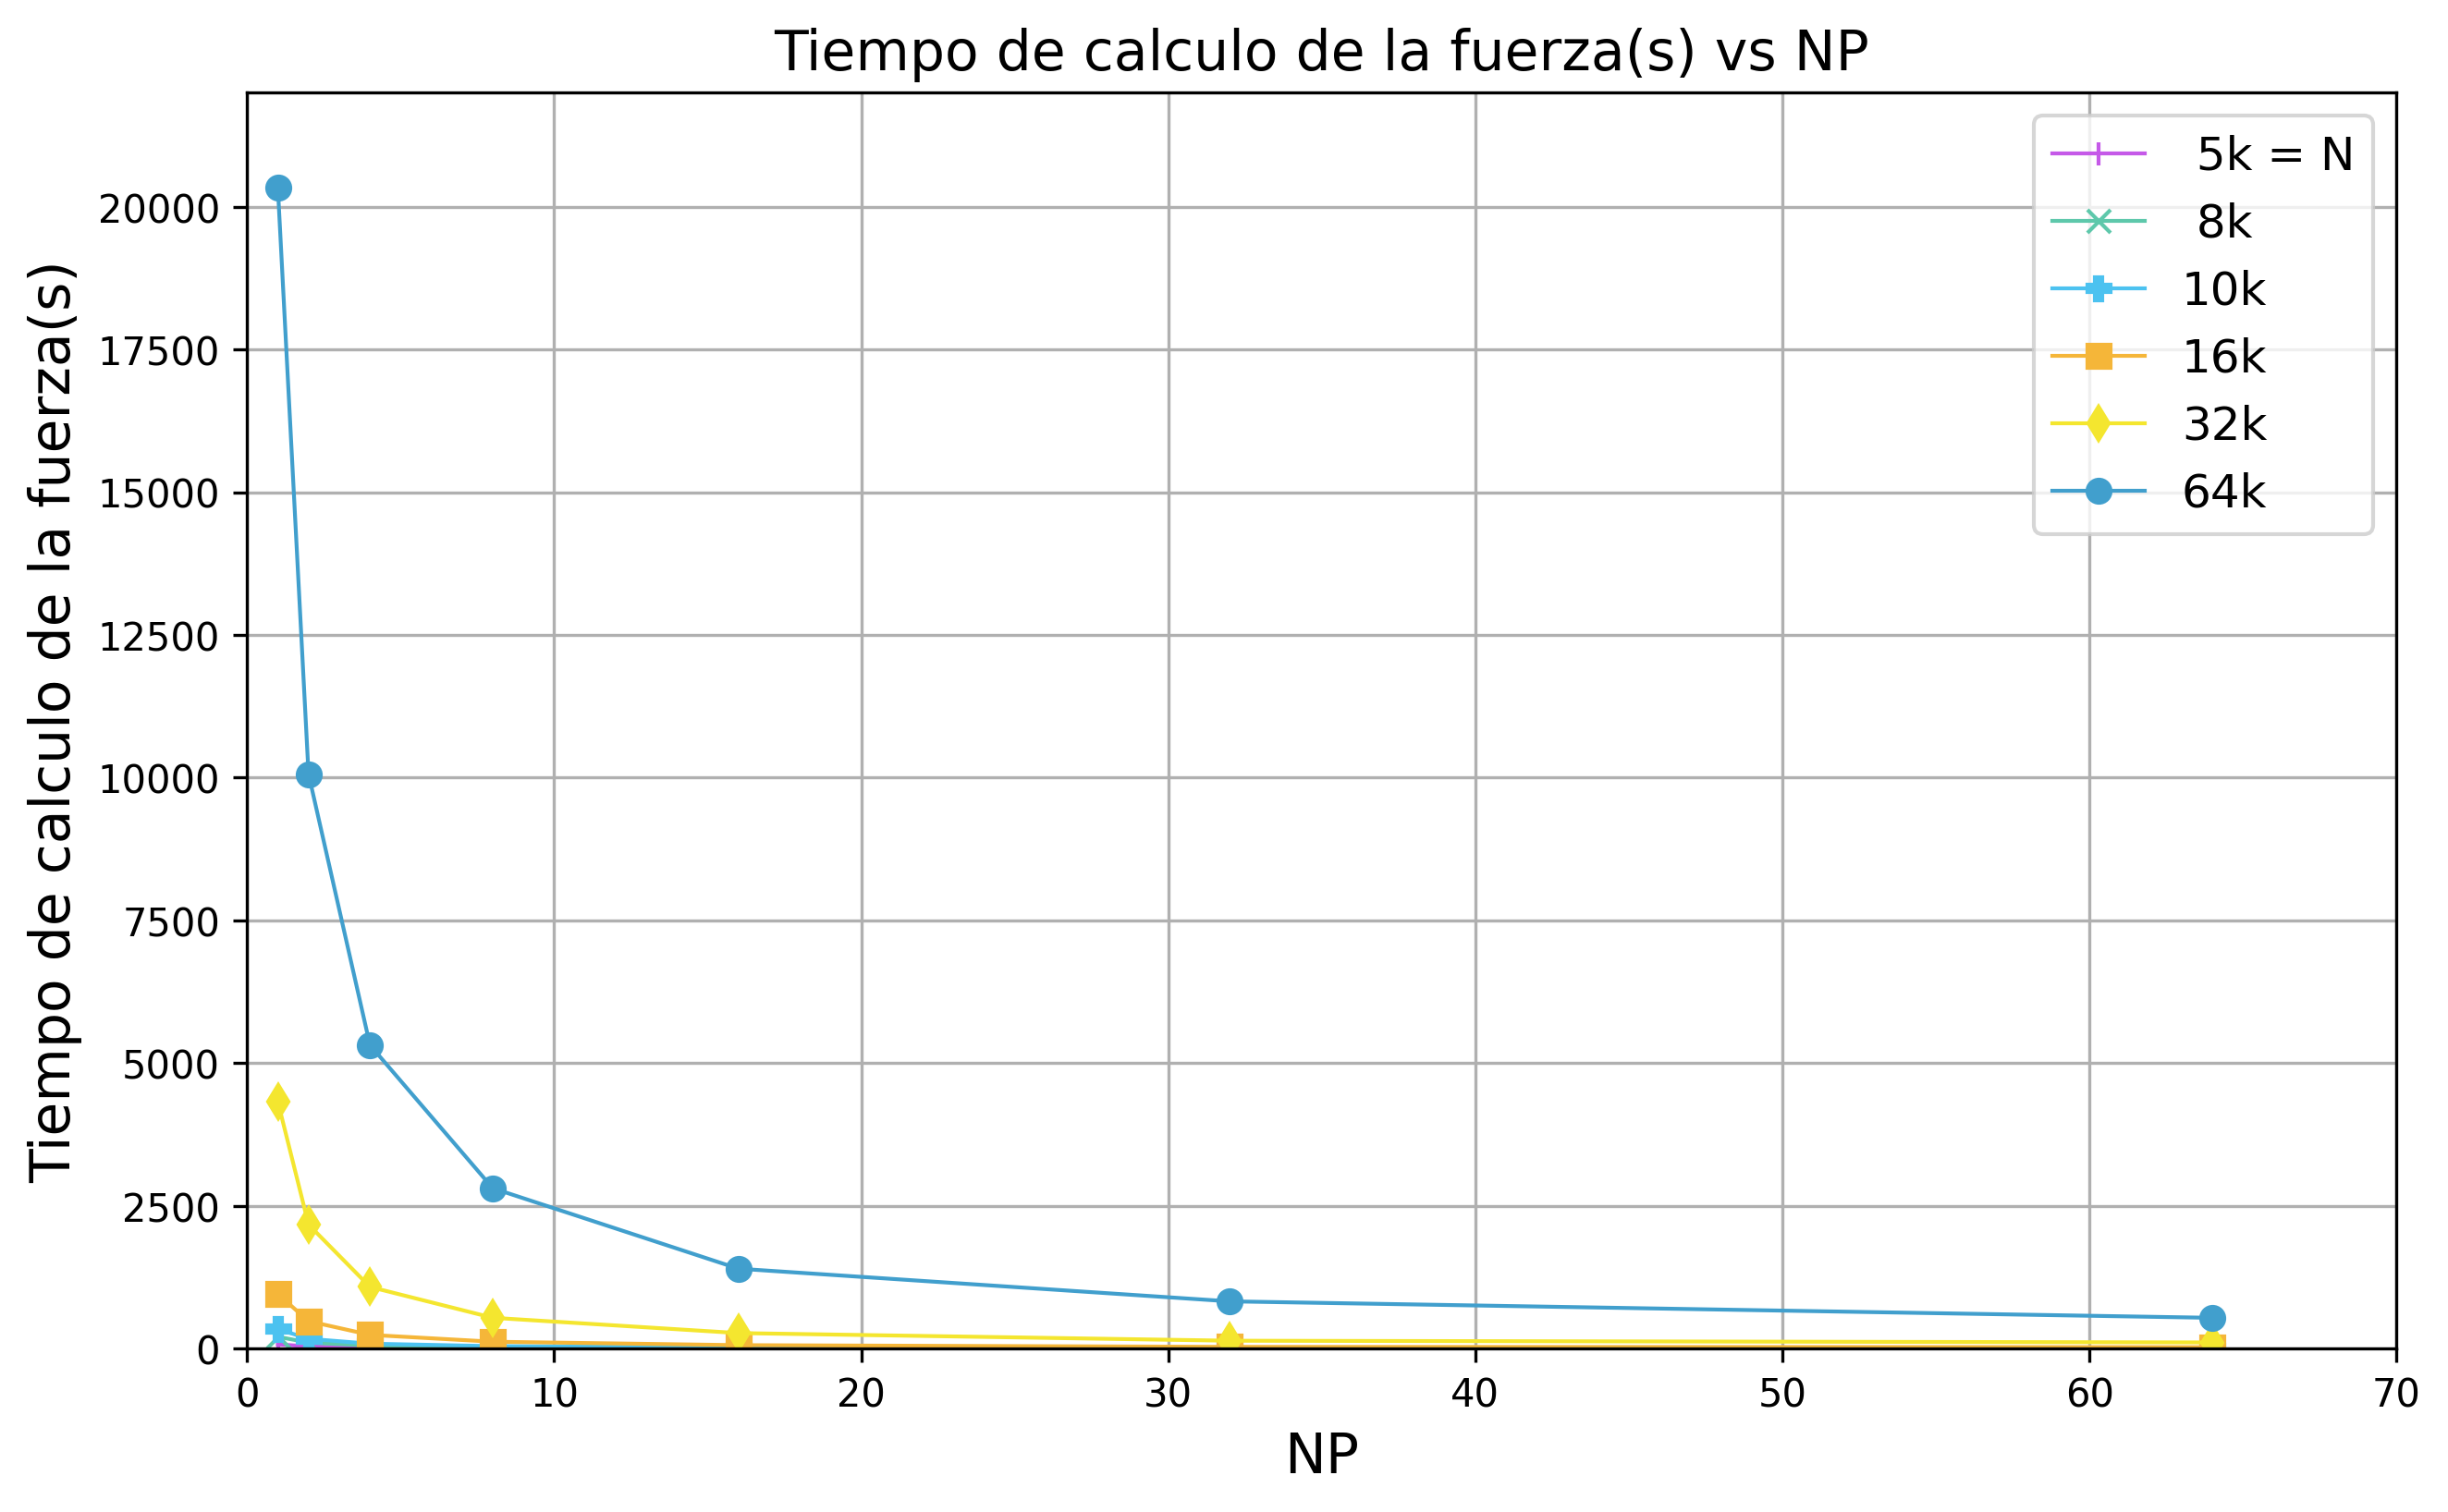

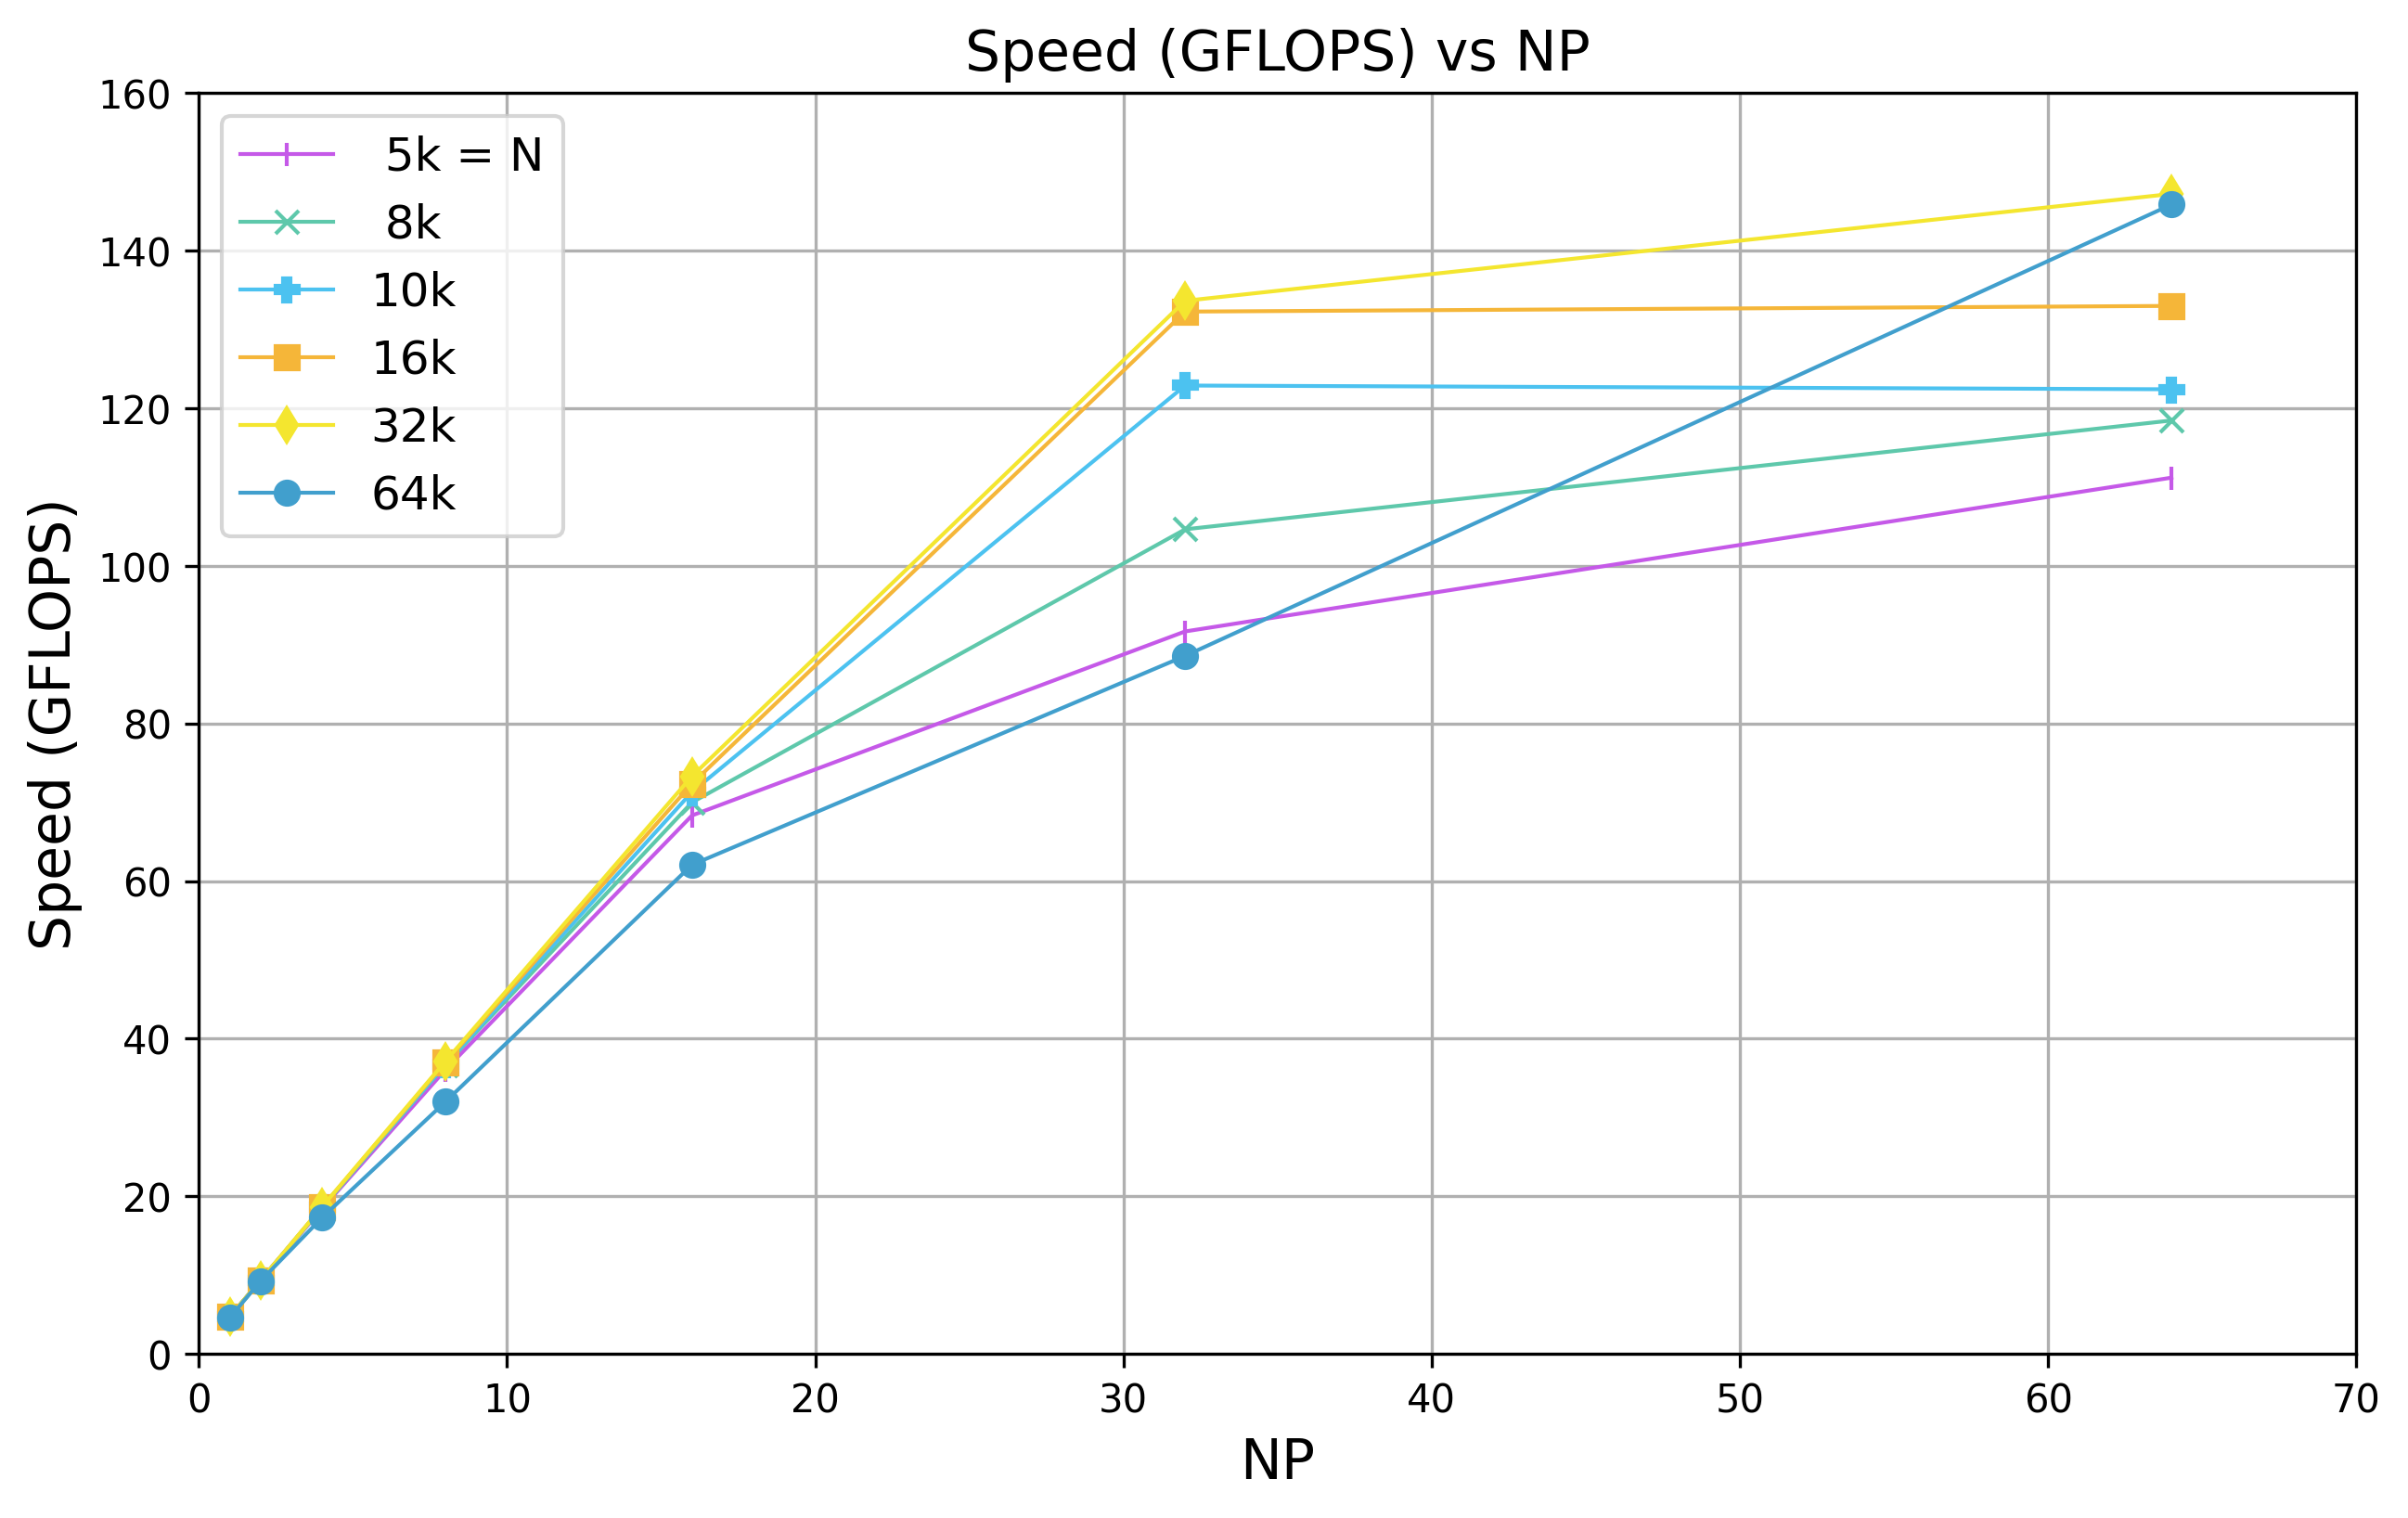

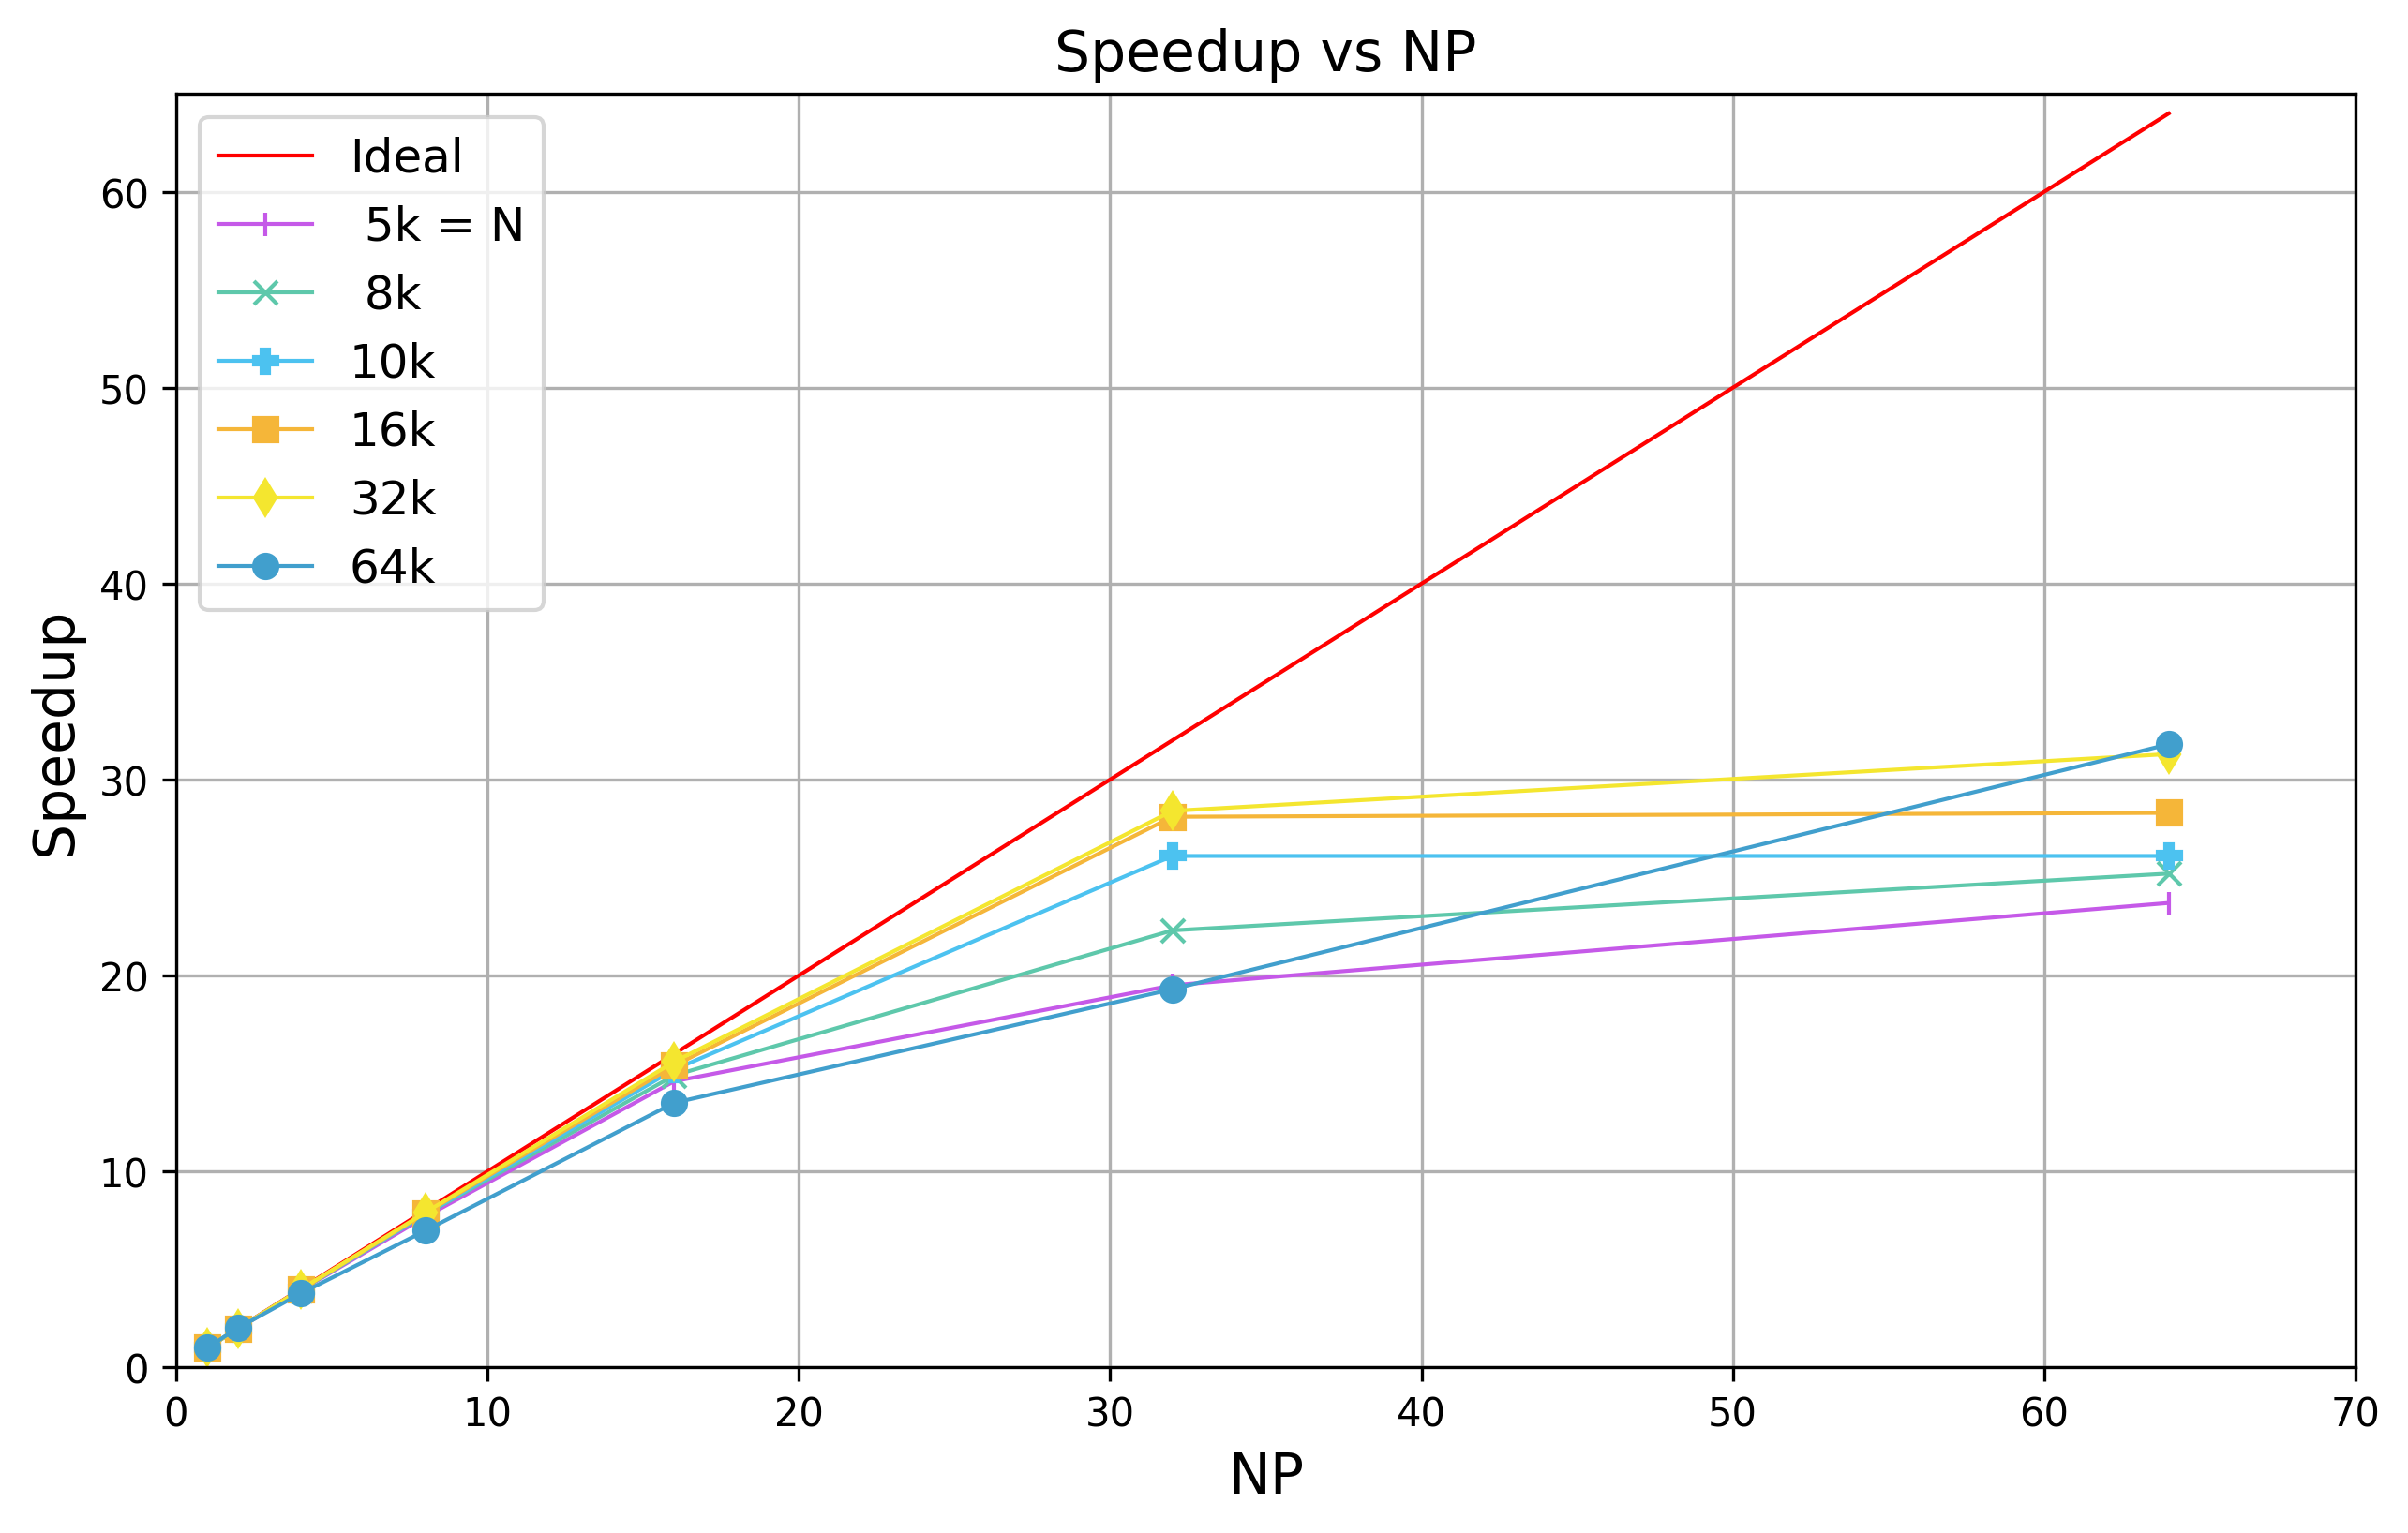

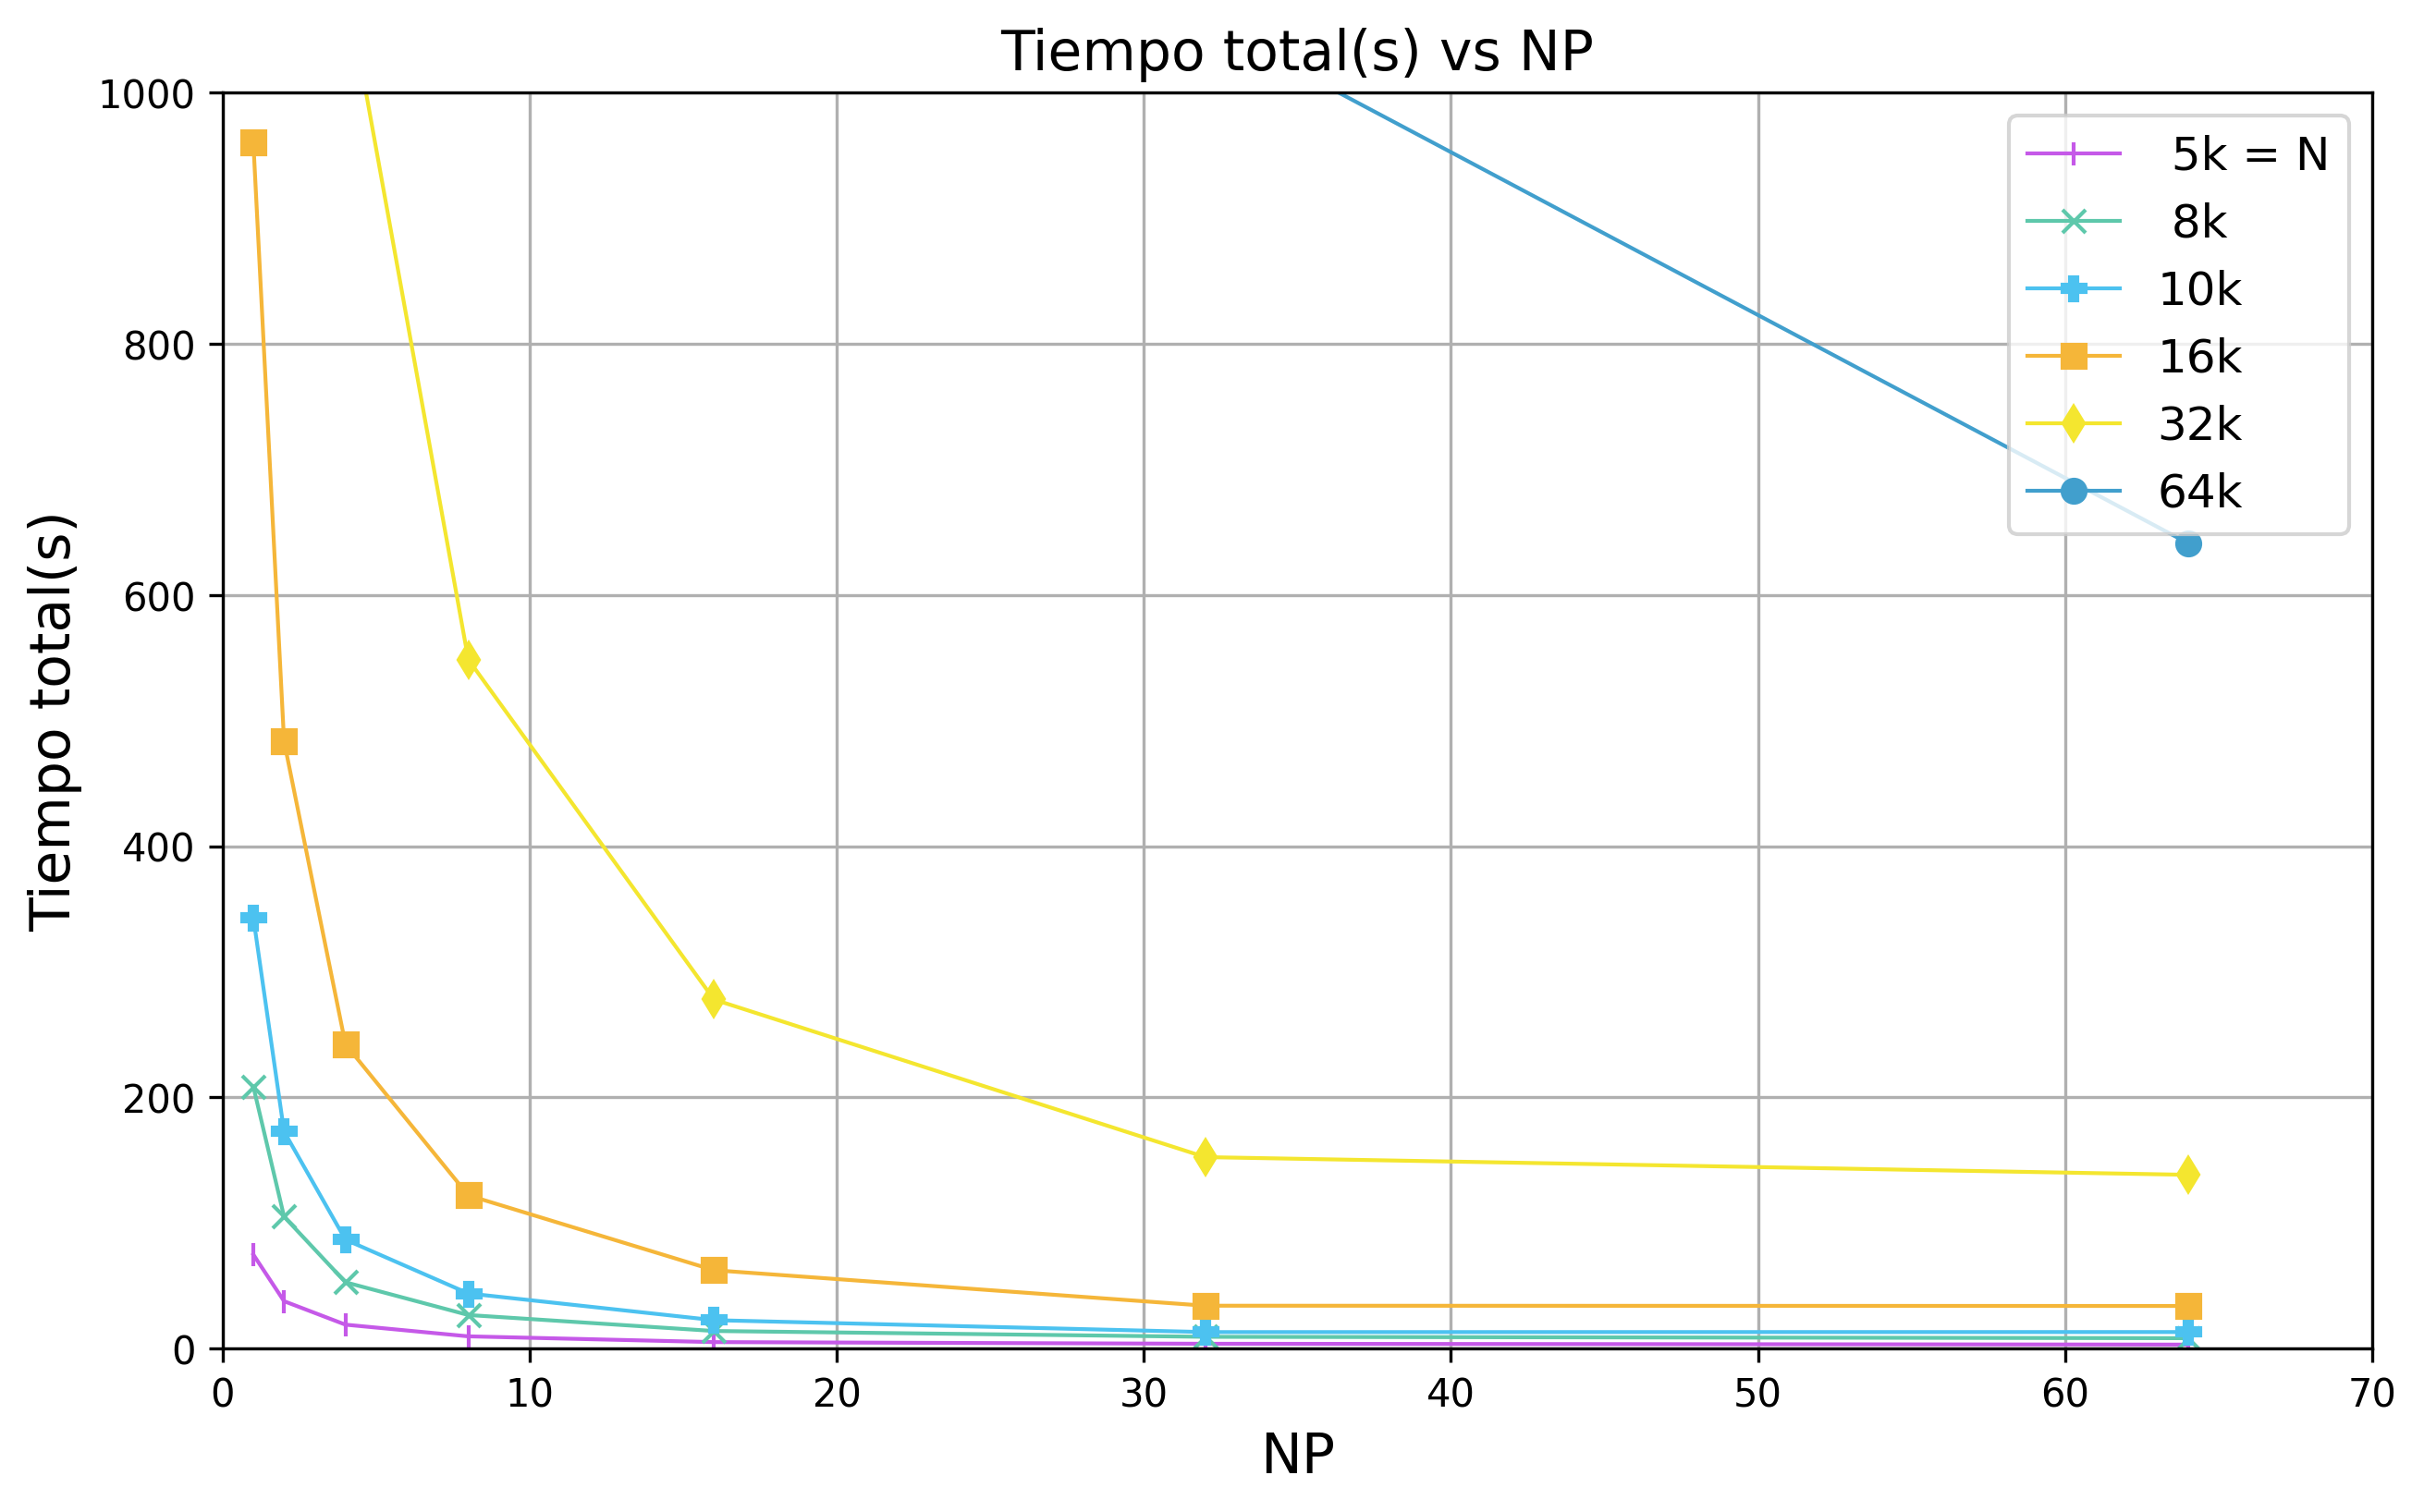

In [3]:
N = [5, 8, 10, 16, 32, 64]
size = len(N)
markers = ["|", "x", "P", "s", "d", "o"]
colors = ["#c559e8", "#5ec8ab", "#4cc2f0", "#f5b639", "#f4e62f", "#419fcd"]
labels_ = [" 5k = N", " 8k", "10k", "16k", "32k", "64k"]
np = [1, 2, 4, 8, 16, 32, 64]
path = "./resultados/variables/"
variables = {"comunicacion" : ["Tiempo de comunicacion(s) vs NP", [0, 75], "upper center"], 
             "eficiencia" : ["Eficiencia vs NP", [0, 1.1], "upper right"], 
             "fuerza" : ["Tiempo de calculo de la fuerza(s) vs NP", [0, 22000], "upper right"], 
             "gflops" : ["Speed (GFLOPS) vs NP", [0, 160], "upper left"], 
             "speedup" : ["Speedup vs NP", [0, 65], "upper left"], 
             "total" : ["Tiempo total(s) vs NP", [0, 1000], "upper right"]}

def get_plot(variable):
    if(not (variable in variables)): raise Exception("Variable not found")
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    components = variables[variable] 
    title = components[0]
    ylim = components[1]
    label_position = components[2]
    ylabel, xlabel = title.split(" vs ")
    ax.set_title(title, fontsize="x-large")
    ax.set_xlabel(xlabel, fontsize="x-large")
    ax.set_ylabel(ylabel, fontsize="x-large")
    
    if(variable == "speedup"):
        ax.plot(np, np, label="Ideal", color="red", linewidth=1)
    elif(variable == "eficiencia"):
        ax.plot(np, [1 for i in range(0, len(np))], label="Ideal", color="red", linewidth=1)
        
    for i in range(size):
        df = pd.read_fwf(path + variable + "_" + str(1024 * N[i]) + ".txt", header=None)
        x = df.iloc[:,0]
        y = df.iloc[:,1]
        ax.plot(x, y, label=labels_[i], marker=markers[i], markersize=6,
                color=colors[i], linewidth=1)
    
    ax.set_ylim(ylim)
    ax.set_xlim([0, 70])
    ax.legend(loc=label_position, fontsize="large")
    ax.grid()
    plt.show()
    
for key in variables:
    get_plot(key)

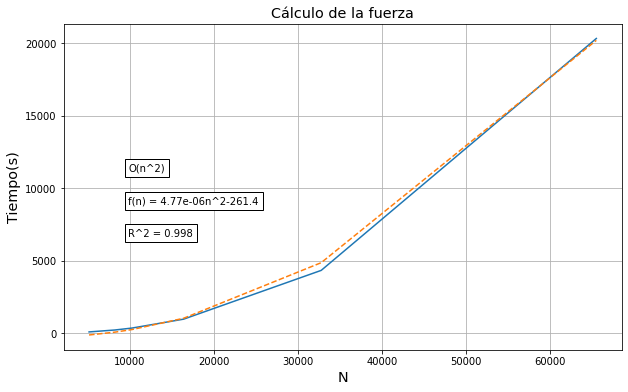

In [4]:
from scipy.optimize import curve_fit
import numpy as np
from sklearn.metrics import r2_score
from matplotlib.offsetbox import AnchoredText

calc_force = [7.4279E+01, 2.0728E+02, 3.4141E+02, 9.5620E+02, 4.3240E+03, 2.0339E+04]
x = np.array([1024*i for i in N])
x_predict = np.arange(1000, max(x), 1000)
y = np.array(calc_force)
parameters, other = curve_fit(lambda t, a, b: a + b*np.power(t, 2),  x,  y)
y_predict = parameters[0] + parameters[1]*np.power(x, 2)
fig, ax = plt.subplots(figsize=(10, 6))

txt = "R^2 = " + str(r2_score(y, y_predict))[:5]
notation = "O(n^2)"
equation = "f(n) = " + str(round(parameters[1], 8)) + "n^2" + str(parameters[0])[:6]
#y_predict = parameters[0] + parameters[1]*np.power(x_predict, 2)
ax.plot(x, y, label="Experimental")
ax.plot(x, y_predict, label="Teórico", linestyle='dashed')
#ax.plot(x_predict, y_predict, label="Teórico", linestyle='dashed')

ax.set_xlabel('N', fontsize="x-large")
ax.set_ylabel('Tiempo(s)', fontsize="x-large")
ax.set_title('Cálculo de la fuerza', fontsize="x-large")


ax.add_artist(AnchoredText(notation, loc='upper left', bbox_to_anchor=(0.1, 0.6), bbox_transform=ax.transAxes))
ax.add_artist(AnchoredText(txt, loc='upper left', bbox_to_anchor=(0.1, 0.4), bbox_transform=ax.transAxes))
ax.add_artist(AnchoredText(equation, loc='upper left', bbox_to_anchor=(0.1, 0.5), bbox_transform=ax.transAxes))
plt.grid()